In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.shape

(614, 13)

In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# Statistical measures
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# percentage of missing values
data.isnull().sum()/614 *100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [12]:
data['Credit_History'].nunique()

2

In [13]:
# Calculate the mode of the column
mode_value = data['Credit_History'].mode()[0]

# Fill null values with the mode and assign back to the original column
data['Credit_History'] = data['Credit_History'].fillna(mode_value)


In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [16]:
data.replace({'Loan_Status':{'N':0,'Y':1}})

<ipython-input-16-6398dba490bd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Loan_Status':{'N':0,'Y':1}})


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [22]:
data['Dependents'].value_counts()

,count
Dependents,
0,299
2,91
1,90
3+,43


In [23]:
data=data.replace(to_replace='3+', value=4)

In [24]:
data['Dependents'].value_counts()

,count
Dependents,
0,299
2,91
1,90
4,43


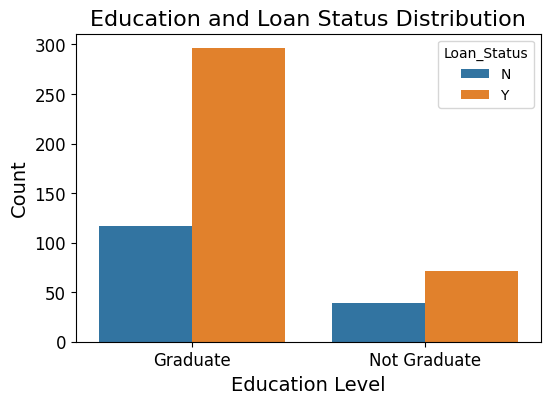

In [40]:
# Education and loan status
plt.figure(figsize=(6, 4))
sns.countplot(
    x='Education',
    hue='Loan_Status',
    data=data,
)
plt.title('Education and Loan Status Distribution', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

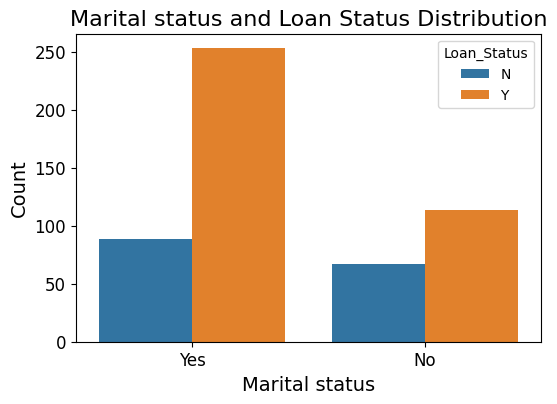

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Married',hue='Loan_Status',data=data)
plt.title('Marital status and Loan Status Distribution', fontsize=16)
plt.xlabel('Marital status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [54]:
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0, 'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

<ipython-input-54-0c95036f0e68>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0, 'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)


In [53]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,4,Graduate,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,2,Y


In [56]:
# split the data
x=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [57]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [58]:
#Train , test split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1, stratify=y, random_state=2)

In [62]:
print(x.shape, X_train.shape, X_test.shape)

(523, 11) (470, 11) (53, 11)


In [63]:
### Training the model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [64]:
# Model evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7978723404255319


In [65]:
from re import X
## Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7924528301886793
